In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import statsmodels.formula.api as smf
import math
from scipy.stats import zscore, shapiro
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings("ignore")

# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

#### Data Dictionary for Market Segmentation:

Carat - Carat weight of the cubic zirconia.

Cut - Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

Color - Colour of the cubic zirconia.With D being the worst and J the best.

Clarity - Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

Depth - The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

Table - The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

Price - the Price of the cubic zirconia.

X - Length of the cubic zirconia in mm.

Y - Width of the cubic zirconia in mm.

Z - Height of the cubic zirconia in mm.

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df = pd.read_csv("cubic_zirconia.csv").drop('Unnamed: 0',axis=1)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [7]:
df.shape

(26967, 10)

In [8]:
round(df.describe(include = ['object']),2)

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [9]:
df.duplicated().sum()

34

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(26933, 10)

In [13]:
df_num = df.select_dtypes(['float','int'])


def univariate(col):
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
    
    plt.suptitle('Univariate Analysis of ' +col, fontsize = 15)
    
    sns.histplot(df[col], kde = True, ax = axs[0], color = 'red')
    sns.boxplot(df[col], ax = axs[1], notch = True)
    
    plt.tight_layout()

In [14]:
unilist = list(df_num.columns.values)

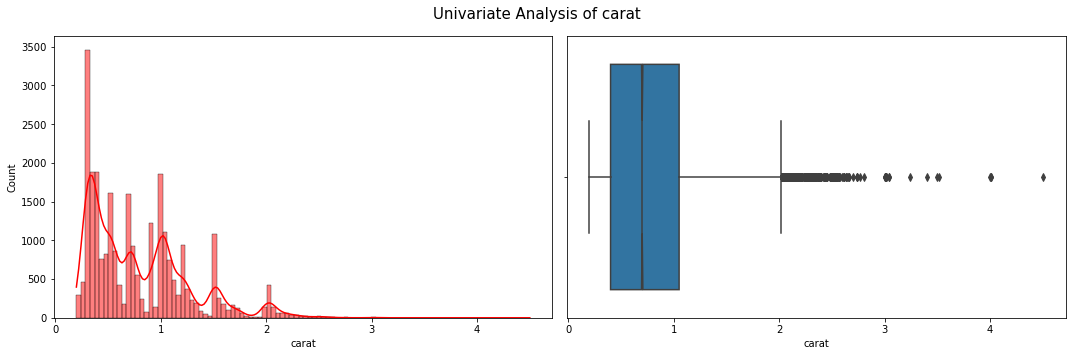

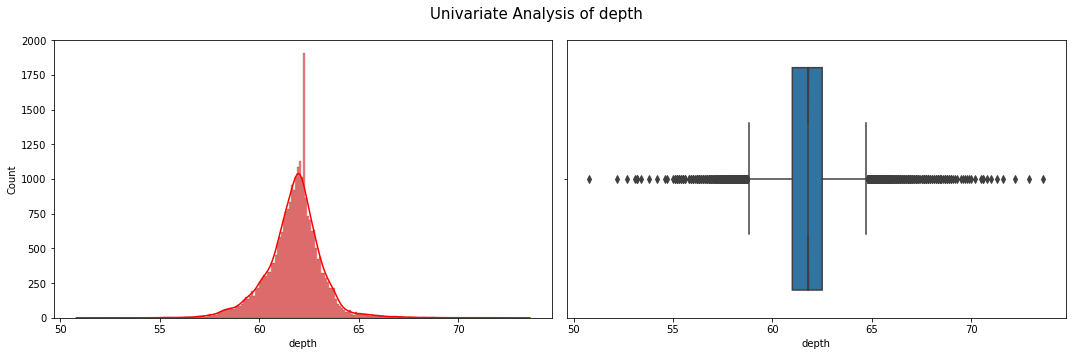

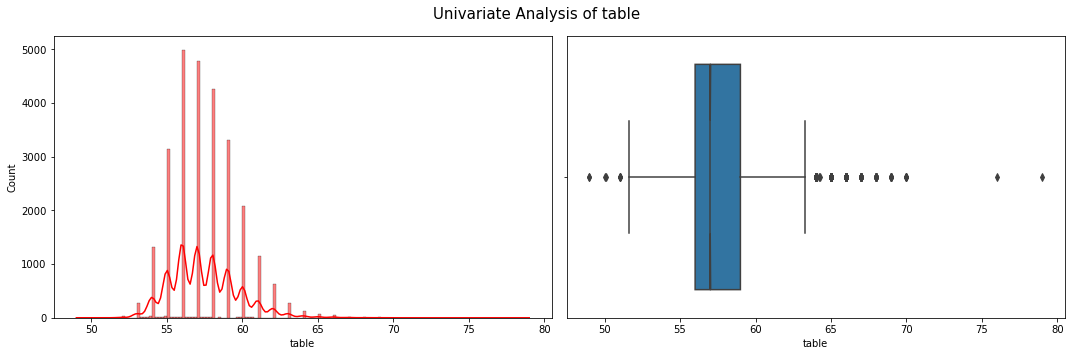

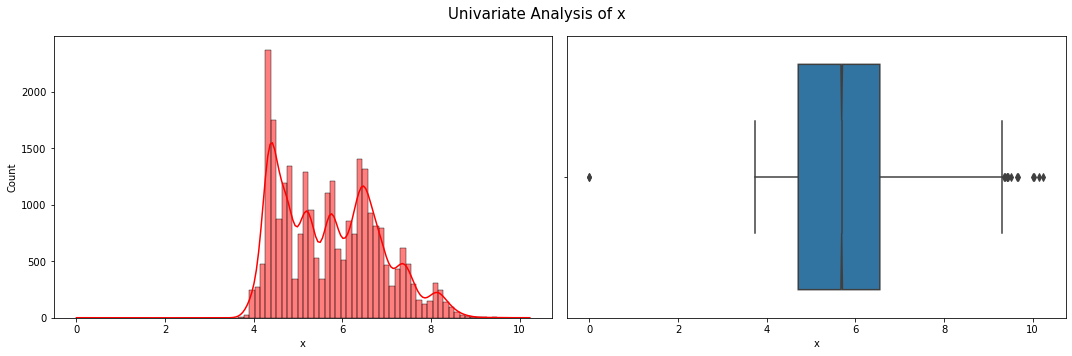

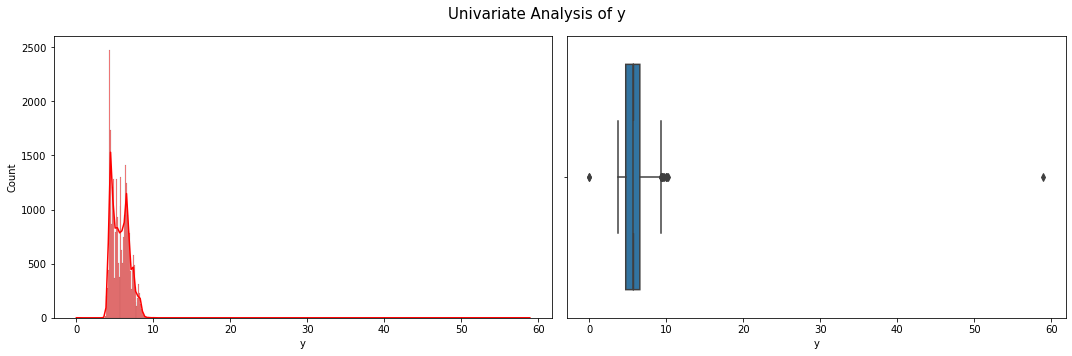

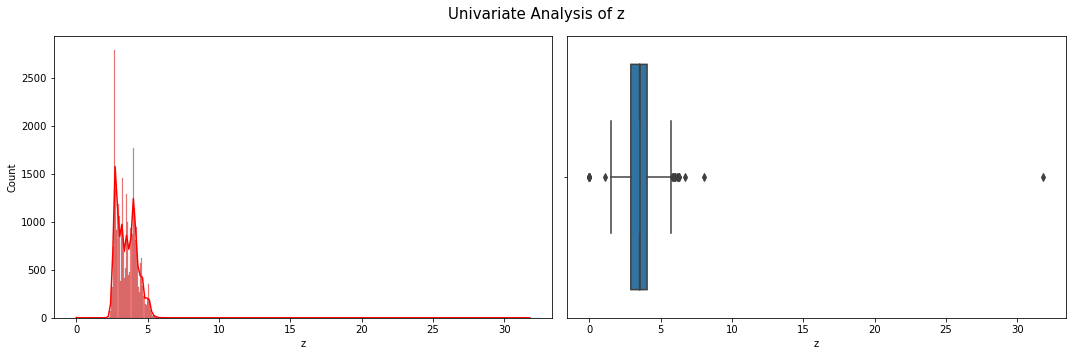

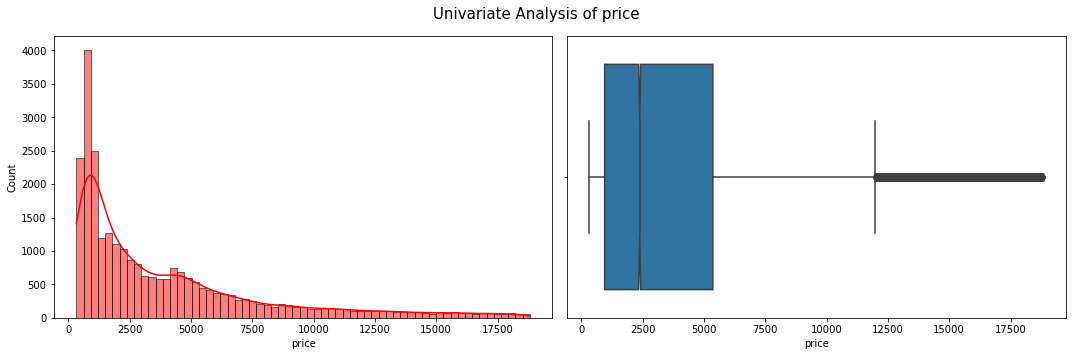

In [15]:
for i in unilist:
    univariate(i)

In [16]:
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype = np.bool),k=1)

<AxesSubplot:>

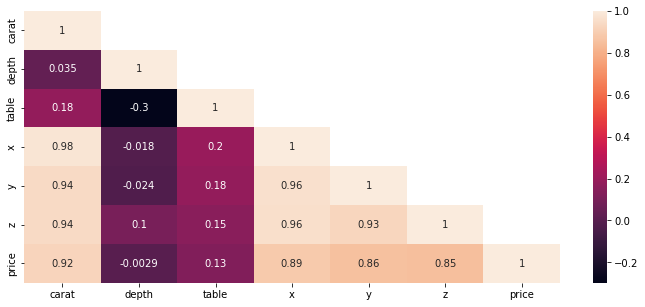

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2g')

In [18]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, ':' '\n', '\n', df[i].value_counts())
        print('\n')

cut :
 
 Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64


color :
 
 G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity :
 
 SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64




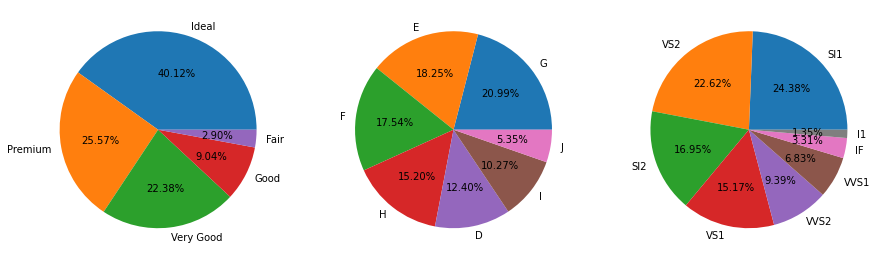

In [19]:
plt.figure(figsize = (15,10))
plt.subplot(131)
plt.pie(x = df['cut'].value_counts(),labels = df['cut'].value_counts().index,autopct = '%1.2f%%')

plt.subplot(132)
plt.pie(x = df['color'].value_counts(),labels = df['color'].value_counts().index,autopct = '%1.2f%%')

plt.subplot(133)
plt.pie(x = df['clarity'].value_counts(),labels = df['clarity'].value_counts().index,autopct = '%1.2f%%')

plt.show()

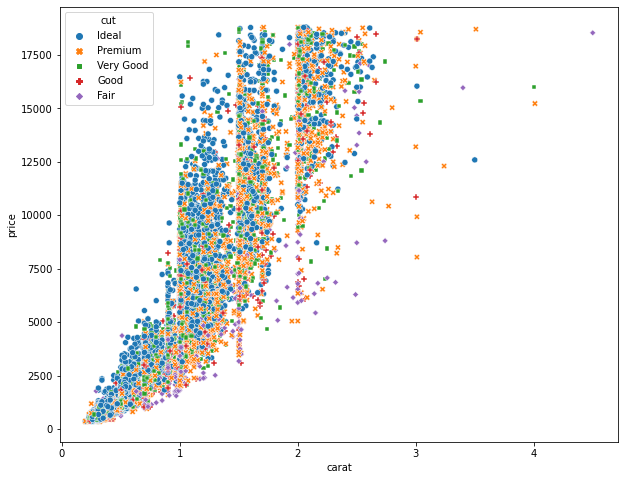

In [20]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df,x = 'carat', y = 'price', hue = 'cut', style = 'cut')
plt.show()

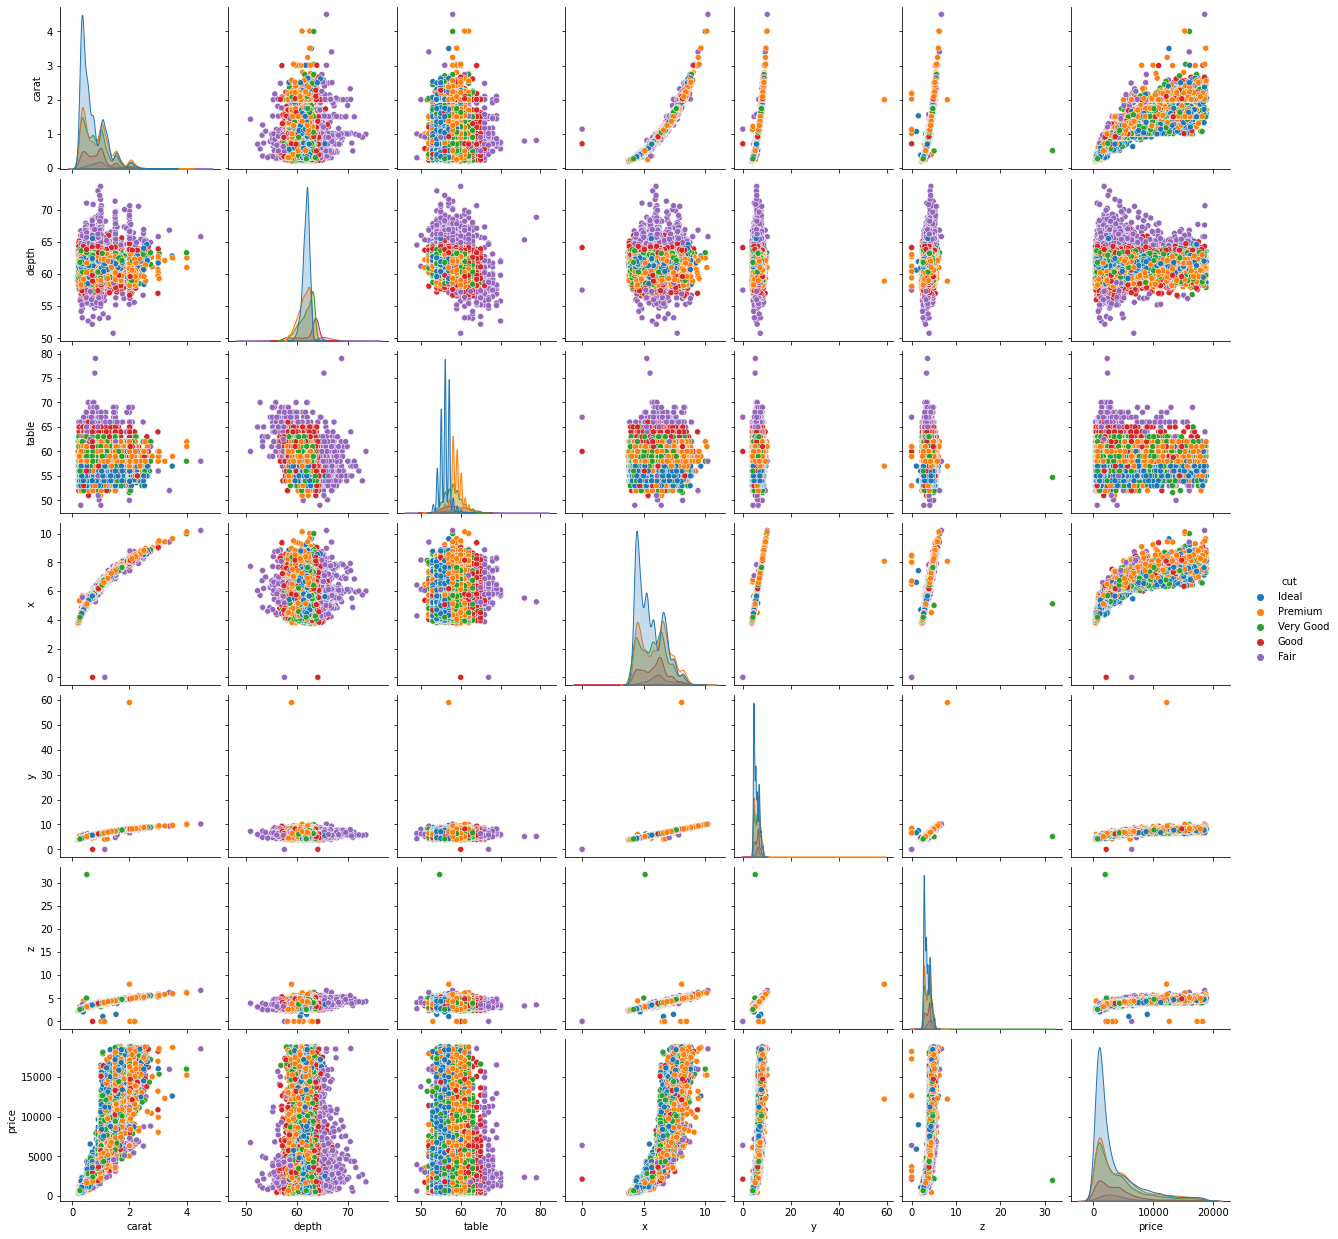

In [21]:
sns.pairplot(df,hue='cut')
plt.show()

<AxesSubplot:xlabel='cut', ylabel='price'>

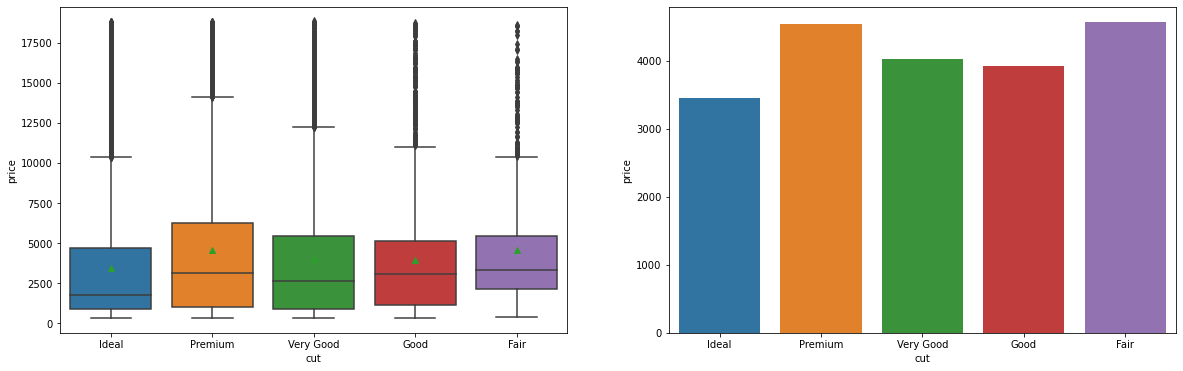

In [22]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = df.cut, y = df.price, ax = axs[0], showmeans = True)
sns.barplot(x = df.cut, y = df.price, ax = axs[1], ci = None, estimator = np.mean)

<AxesSubplot:xlabel='color', ylabel='price'>

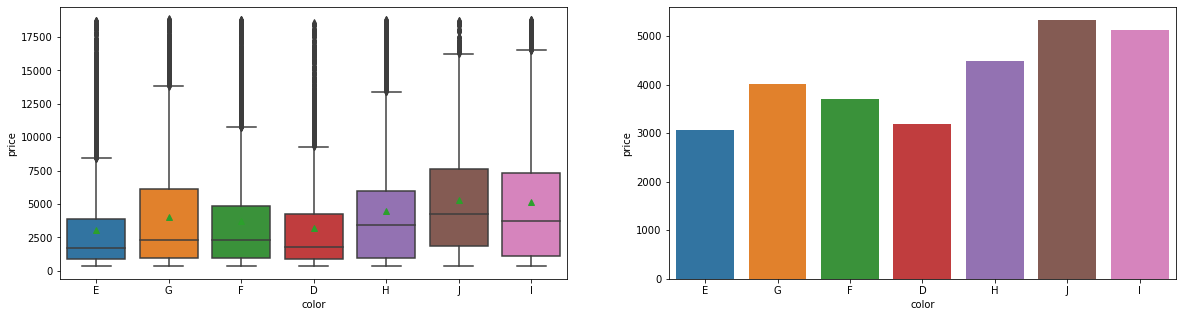

In [23]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = df.color, y = df.price, ax = axs[0], showmeans = True)
sns.barplot(x = df.color, y = df.price, ax = axs[1], ci = None, estimator = np.mean)

<AxesSubplot:xlabel='clarity', ylabel='price'>

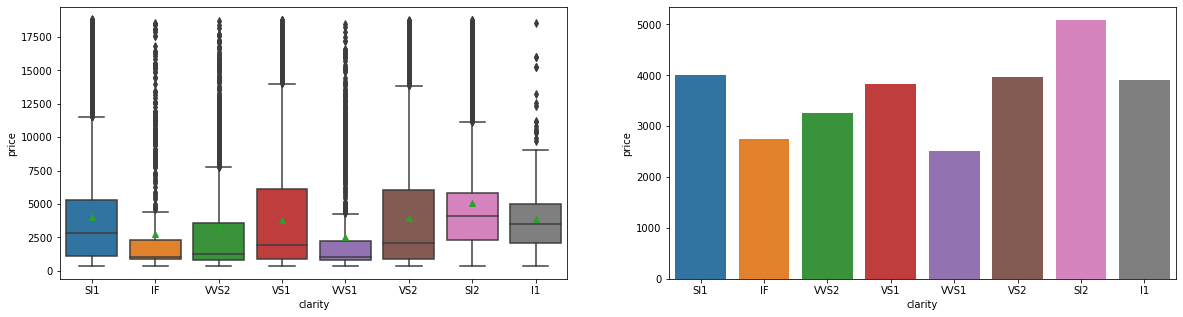

In [24]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = df.clarity, y = df.price, ax = axs[0], showmeans = True)
sns.barplot(x = df.clarity, y = df.price, ax = axs[1], ci = None, estimator = np.mean)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [25]:
df['depth'] = df['depth'].fillna(df['depth'].mean())

In [26]:
df[(df['x'] == 0) & (df['y'] == 0) & (df['z'] == 0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [27]:
df = df[df['x'] != 0]
df = df[df['y'] != 0]
df = df[df['z'] != 0]

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26925.0,0.797821,0.477085,0.20,0.40,0.70,1.05,4.50
depth,26925.0,61.745566,1.393430,50.80,61.10,61.80,62.50,73.60
table,26925.0,57.455305,2.231327,49.00,56.00,57.00,59.00,79.00
x,26925.0,5.729385,1.126081,3.73,4.71,5.69,6.55,10.23
y,26925.0,5.733152,1.163820,3.71,4.71,5.70,6.54,58.90
z,26925.0,3.538820,0.717483,1.07,2.90,3.52,4.04,31.80
price,26925.0,3936.249991,4020.983187,326.00,945.00,2373.00,5353.00,18818.00


In [29]:
df.shape

(26925, 10)

In [30]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [31]:
df['clarity']=np.where(df['clarity'] =='SI1', 'SI', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', 'SI', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', 'VS', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', 'VS', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', 'VVS', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', 'VVS', df['clarity'])

In [32]:
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])

df['color']=np.where(df['color'] =='D', '0', df['color'])
df['color']=np.where(df['color'] =='E', '1', df['color'])
df['color']=np.where(df['color'] =='F', '2', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])
df['color']=np.where(df['color'] =='H', '4', df['color'])
df['color']=np.where(df['color'] =='I', '5', df['color'])
df['color']=np.where(df['color'] =='J', '6', df['color'])

df['clarity']=np.where(df['clarity'] =='IF', '0', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS', '4', df['clarity'])

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,4,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,2,4,60.4,59.0,4.35,4.43,2.65,779


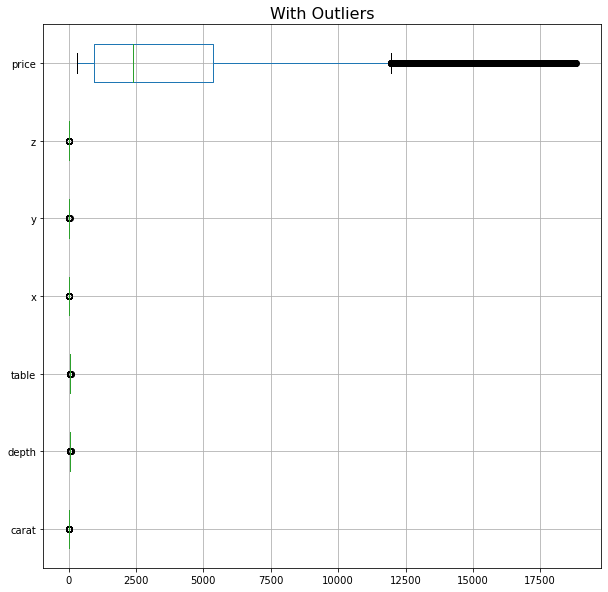

In [34]:
cont=df.dtypes[(df.dtypes!='object')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [35]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [36]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

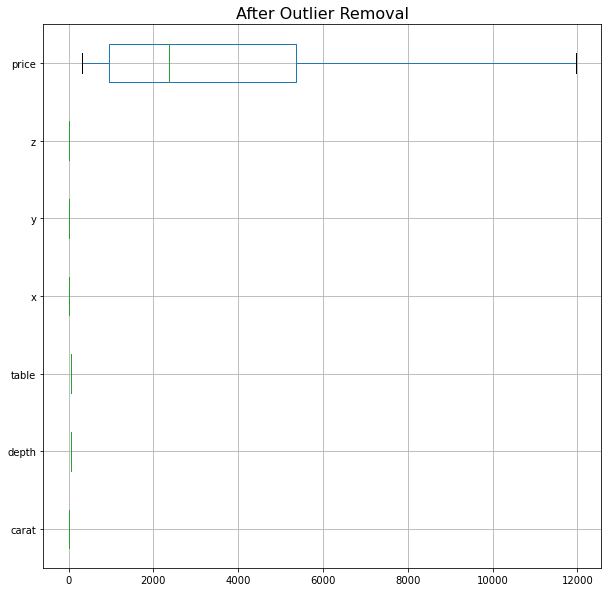

In [37]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [38]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
0      779
1     2434
2     6027
3     6880
4    10805
Name: cut, dtype: int64


COLOR :  7
6    1440
5    2765
0    3341
4    4091
2    4722
1    4916
3    5650
Name: color, dtype: int64


CLARITY :  5
1      362
0      891
4     4369
3    10178
2    11125
Name: clarity, dtype: int64




In [39]:
df['cut']=df['cut'].astype(object).astype(int)
df['color']=df['color'].astype(object).astype(int)
df['clarity']=df['clarity'].astype(object).astype(int)

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [40]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [41]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4,1,2,62.1,58.0,4.27,4.29,2.66
1,0.33,3,3,0,60.8,58.0,4.42,4.46,2.70
2,0.90,2,1,4,62.2,60.0,6.04,6.12,3.78
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96
4,0.31,4,2,4,60.4,59.0,4.35,4.43,2.65


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18847 entries, 5030 to 235
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18847 non-null  float64
 1   cut      18847 non-null  int32  
 2   color    18847 non-null  int32  
 3   clarity  18847 non-null  int32  
 4   depth    18847 non-null  float64
 5   table    18847 non-null  float64
 6   x        18847 non-null  float64
 7   y        18847 non-null  float64
 8   z        18847 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.2 MB


In [44]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
5030,1.10,1,1,2,63.3,56.0,6.53,6.58,4.15
12108,1.01,2,0,2,64.0,56.0,6.30,6.38,4.06
20181,0.67,1,5,3,60.7,61.4,5.60,5.64,3.41
4712,0.76,1,3,2,59.0,63.0,6.05,5.97,3.47
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99


In [45]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
11971,1.510,2,5,2,63.0,59.0,7.26,7.31,4.59
3294,1.020,3,3,2,60.8,58.0,6.50,6.46,3.94
25427,2.025,3,0,2,60.0,58.0,8.31,8.23,4.96
709,1.710,2,2,3,61.9,61.0,7.61,7.67,4.73
8010,1.500,1,4,3,63.9,59.0,7.25,7.18,4.61


In [46]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,1,2,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2,0,2,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1,5,3,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1,3,2,59.0,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618.0


In [47]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [48]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9409.661275873284
The coefficient for cut is 156.50625964369178
The coefficient for color is -227.1973537195468
The coefficient for clarity is 425.4417343185445
The coefficient for depth is -6.745788707654608
The coefficient for table is -33.98837227650518
The coefficient for x is -2555.8564233651978
The coefficient for y is 2419.800348768334
The coefficient for z is -1025.1345513440062


In [49]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2061.9762330956155


In [50]:
regression_model.score(X_train, y_train)

0.907681262834382

In [51]:
regression_model.score(X_test, y_test)

0.9102431112128656

In [52]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1,1,2,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2,0,2,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1,5,3,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1,3,2,59.0,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3,3,3,62.8,59.0,6.37,6.34,3.99,6618.0


In [53]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat + depth + table + x + y + z + color + clarity + cut', data = data_train).fit()
lm1.params

Intercept    2061.976233
carat        9409.661276
depth          -6.745789
table         -33.988372
x           -2555.856423
y            2419.800349
z           -1025.134551
color        -227.197354
clarity       425.441734
cut           156.506260
dtype: float64

In [54]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.058e+04
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:40:14   Log-Likelihood:            -1.5787e+05
No. Observations:               18847   AIC:                         3.158e+05
Df Residuals:                   18837   BIC:                         3.158e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2061.9762    923.092      2.234      0.0

In [55]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [56]:
math.sqrt(mse)

1044.1144797721854

In [57]:
regression_model.score(X_test, y_test)

0.9102431112128656

In [58]:
y_pred = regression_model.predict(X_test)

In [59]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

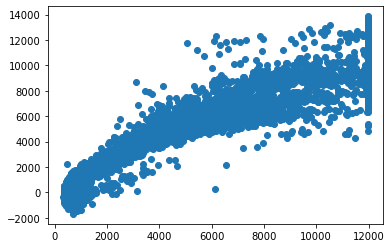

In [60]:
plt.scatter(y_test['price'], y_pred)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18847 entries, 5030 to 235
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18847 non-null  float64
 1   cut      18847 non-null  int32  
 2   color    18847 non-null  int32  
 3   clarity  18847 non-null  int32  
 4   depth    18847 non-null  float64
 5   table    18847 non-null  float64
 6   x        18847 non-null  float64
 7   y        18847 non-null  float64
 8   z        18847 non-null  float64
dtypes: float64(6), int32(3)
memory usage: 1.2 MB


In [62]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [63]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [64]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.2512899513477598
The coefficient for cut is 0.050346889645917485
The coefficient for color is -0.1119604098217393
The coefficient for clarity is 0.10926011236806346
The coefficient for depth is -0.002378022918964528
The coefficient for table is -0.021193979860987224
The coefficient for x is -0.8286154429657883
The coefficient for y is 0.7791564312279321
The coefficient for z is -0.2053906720562874


In [65]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.700879107820098e-16


In [66]:
regression_model.score(X_test_scaled, y_test_scaled)

0.9102447719111884

In [67]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [68]:
math.sqrt(mse)

0.2995917690605196

In [69]:
y_pred = regression_model.predict(X_test_scaled)

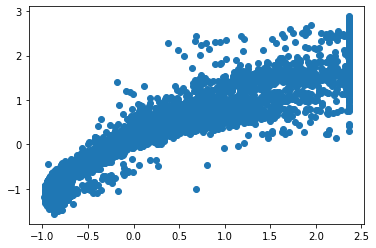

In [70]:
plt.scatter(y_test_scaled['price'], y_pred)

In [71]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [72]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.12104511477665
cut ---> 10.181138884451808
color ---> 3.6693970158880136
clarity ---> 10.27320983628489
depth ---> 1208.281297081905
table ---> 874.0702428119733
x ---> 10607.077935100035
y ---> 9322.733506762192
z ---> 3289.392854874187


# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

#### Data Dictionary:

Holiday_Package: Opted for Holiday Package yes/no?

Salary: Employee salary

age: Age in years

educ: Years of formal education

no_young_children: The number of young children (younger than 7 years)

no_older_children: Number of older children

foreign: foreigner Yes/No

In [73]:
df1 = pd.read_csv('Holiday_Package.csv').drop('Unnamed: 0',axis=1)

In [74]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [75]:
df1.shape

(872, 7)

In [76]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [77]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [79]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df1[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [80]:
df1.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

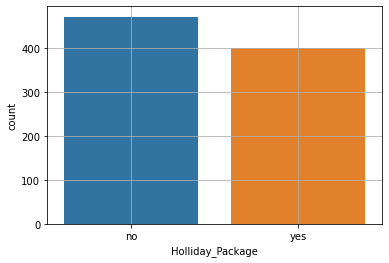

In [81]:
sns.countplot(df1.Holliday_Package)
plt.grid()
plt.show()

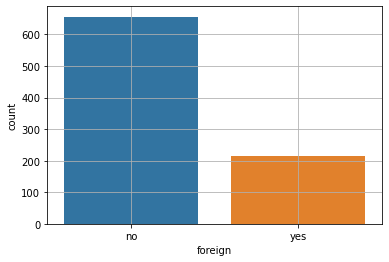

In [82]:
sns.countplot(df1.foreign)
plt.grid()
plt.show()

In [83]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print(feature)
        print(df1[feature].value_counts())
        print('\n')

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

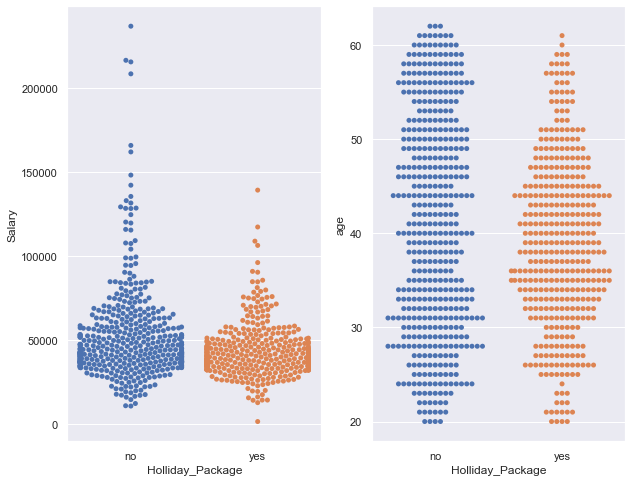

In [84]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1)
plt.subplot(1,2,1)
sns.swarmplot(data=df1,x='Holliday_Package', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df1,x='Holliday_Package', y='age')

<AxesSubplot:xlabel='foreign', ylabel='count'>

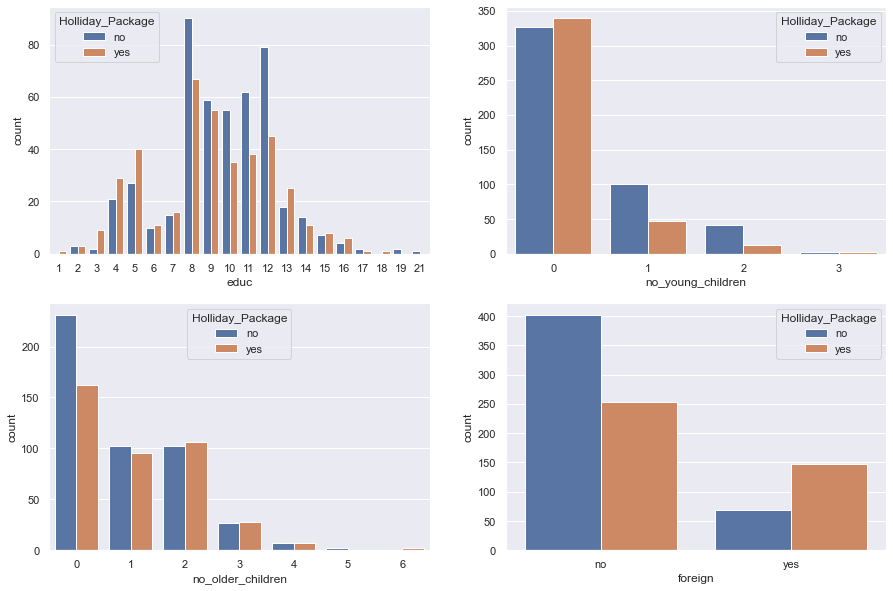

In [85]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(data=df1,hue='Holliday_Package', x='educ')
plt.subplot(2,2,2)
sns.countplot(data=df1,hue='Holliday_Package', x='no_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df1,hue='Holliday_Package', x='no_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df1,hue='Holliday_Package', x='foreign')

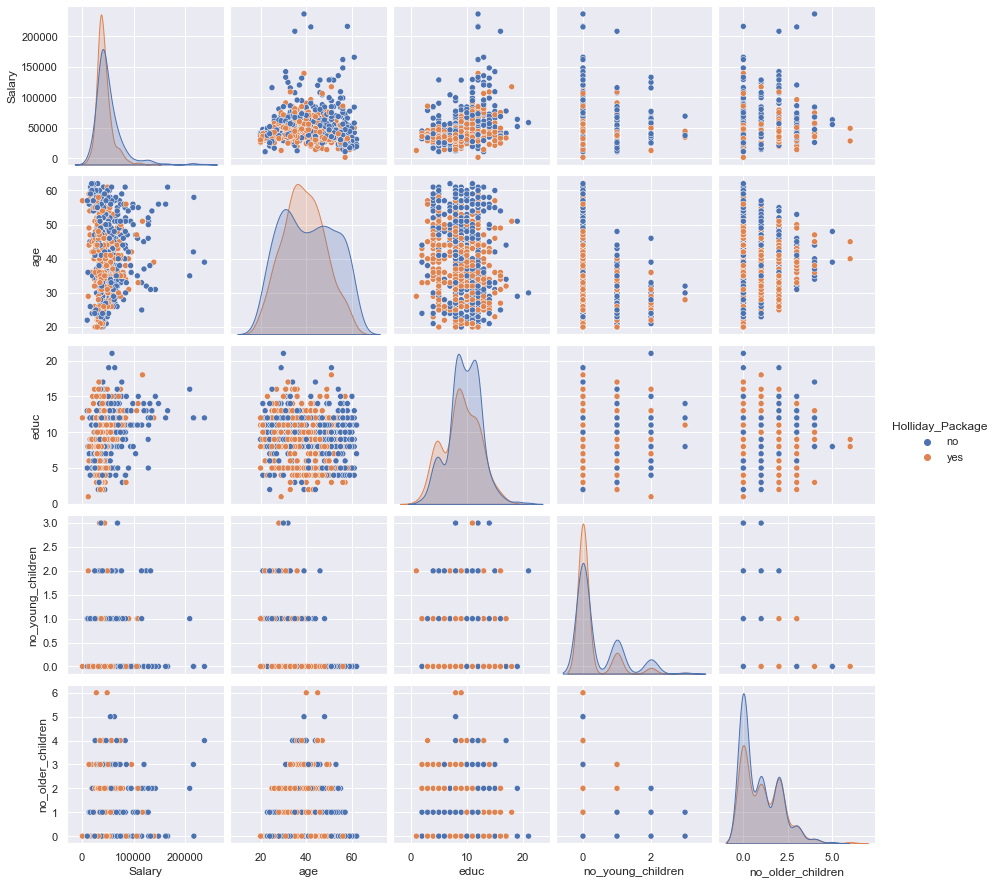

In [86]:
sns.pairplot(df1,diag_kind='kde', hue='Holliday_Package');

In [87]:
def checkvif(A):
    vif = pd.DataFrame()
    vif["Variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
    print (vif)

In [88]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [89]:
A = df1[['Salary','age','educ','no_young_children','no_older_children']]
checkvif(A)

           Variables       VIF
0             Salary  6.027872
1                age  6.832751
2               educ  8.890845
3  no_young_children  1.403995
4  no_older_children  1.817912


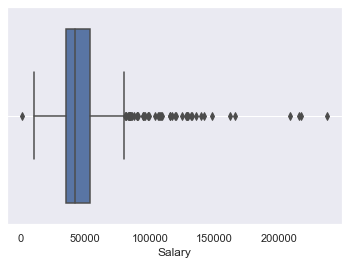

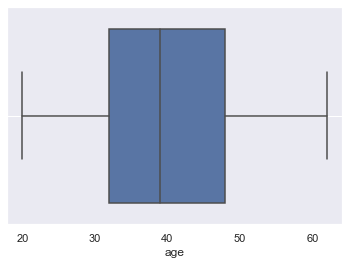

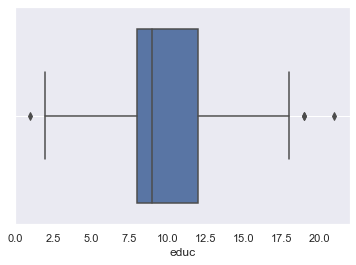

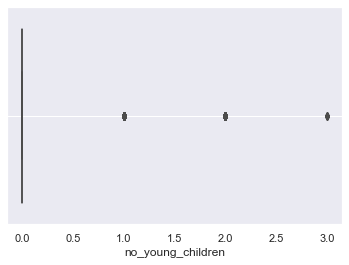

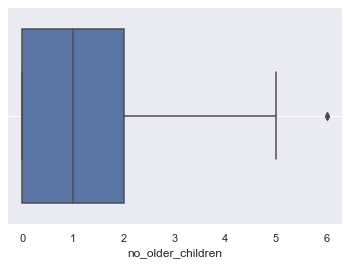

In [90]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.grid()
    plt.show();

In [91]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [92]:
lr,ur=remove_outlier(df1['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['Salary']=np.where(df1['Salary']>ur,ur,df1['Salary'])
df1['Salary']=np.where(df1['Salary']<lr,lr,df1['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


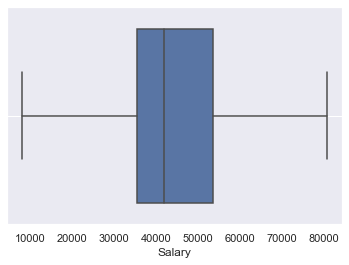

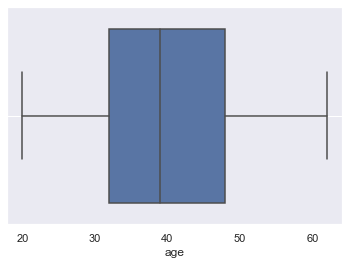

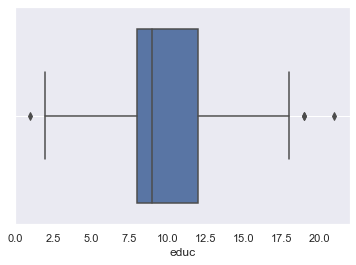

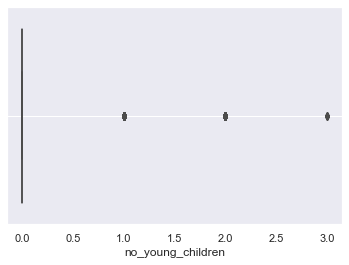

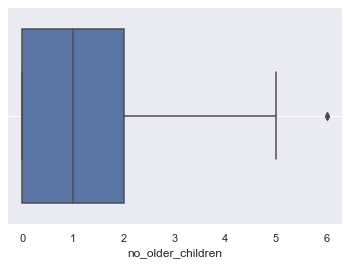

In [93]:
cols = ['Salary','age','educ','no_young_children','no_older_children']
for i in cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.grid()
    plt.show();

In [94]:
df1.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


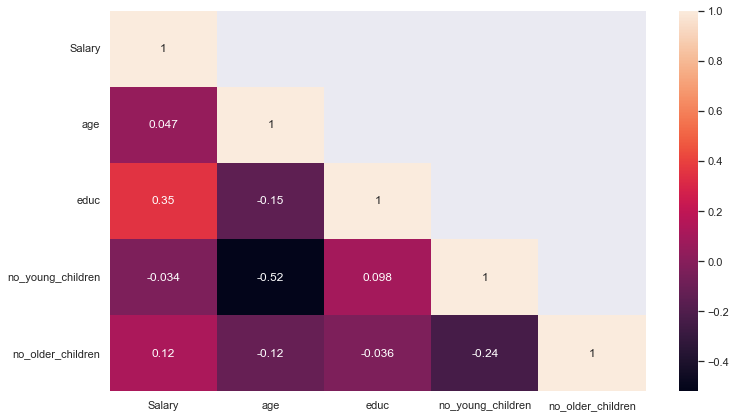

In [95]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(), annot=True,mask=np.triu(df1.corr(),+1));

In [96]:
df1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,45608.336869,39.955275,9.307339,0.311927,0.982798
std,15699.745151,10.551675,3.036259,0.612870,1.086786
min,8105.750000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,80687.750000,62.000000,21.000000,3.000000,6.000000


In [97]:
LE = LabelEncoder()

In [98]:
df1['Holliday_Package'] = LE.fit_transform(df1['Holliday_Package'])
df1.head()
df1['foreign'] = LE.fit_transform(df1['foreign'])
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [99]:
df1_dummy = pd.get_dummies(df1,drop_first=True)
df1_dummy.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30,8,1,1,0
1,1,37207.0,45,8,0,1,0
2,0,58022.0,46,9,0,0,0
3,0,66503.0,31,11,2,0,0
4,0,66734.0,44,12,0,2,0


In [100]:
X = df1_dummy.drop('Holliday_Package', axis=1)
y = df1_dummy['Holliday_Package']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df1_dummy['Holliday_Package'])

In [102]:
print ('Shape of X_train', X_train.shape)
print ('Shape of X_test', X_test.shape)
print ('Shape of y_train', y_train.shape)
print ('Shape of y_test', y_test.shape)
print ('Shape of df1 dataframe' , df1.shape)

Shape of X_train (610, 6)
Shape of X_test (262, 6)
Shape of y_train (610,)
Shape of y_test (262,)
Shape of df1 dataframe (872, 7)


In [103]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [104]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [105]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [106]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [107]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677850,0.322150
1,0.534541,0.465459
2,0.691849,0.308151
3,0.487796,0.512204
4,0.571939,0.428061


In [108]:
model.score(X_train, y_train)

0.6672131147540984

AUC: 0.733


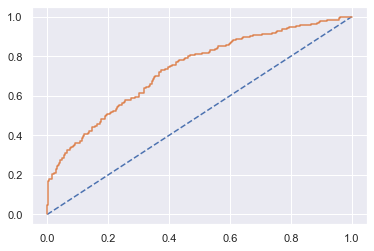

In [109]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [110]:
model.score(X_test, y_test)

0.648854961832061

AUC: 0.733


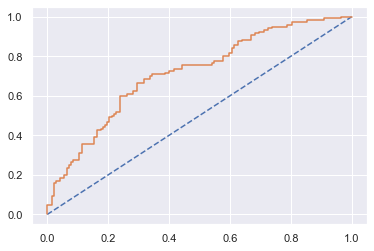

In [111]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [112]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

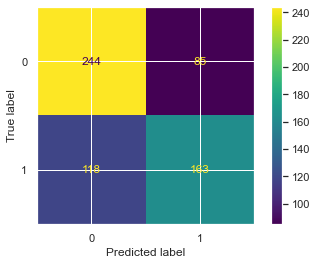

In [113]:
plot_confusion_matrix(model,X_train,y_train);

In [114]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [115]:
confusion_matrix(y_test, ytest_predict)

array([[108,  34],
       [ 58,  62]], dtype=int64)

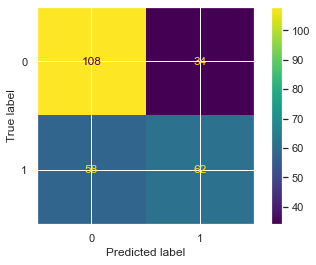

In [116]:
plot_confusion_matrix(model,X_test,y_test);

In [117]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262



In [118]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs', 'liblinear'],
      'tol':[0.0001,0.00001]}

In [119]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [120]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [121]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [122]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', tol=1e-05)


In [123]:
best_model = grid_search.best_estimator_

In [124]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [125]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.668853,0.331147
1,0.627745,0.372255
2,0.681034,0.318966
3,0.586411,0.413589
4,0.557742,0.442258


In [127]:
best_model.score(X_train, y_train)

0.659016393442623

In [128]:
best_model.score(X_test, y_test)

0.6641221374045801

AUC: 0.729


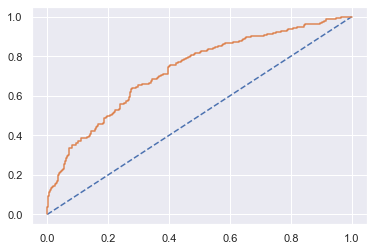

In [130]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.729


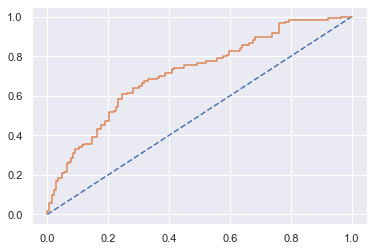

In [131]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       329
           1       0.66      0.54      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610
 



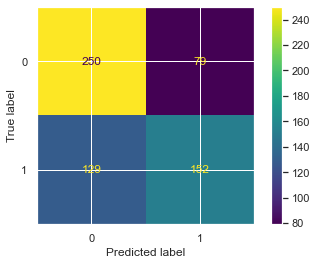

In [132]:
plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       142
           1       0.67      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



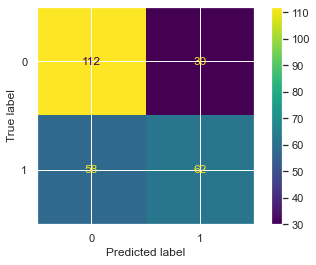

In [133]:
plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

##### LDA

In [134]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,y)
model

LinearDiscriminantAnalysis()

In [135]:
pred_class_train = model.predict(X_train)

In [136]:
pred_class_test = model.predict(X_test)

In [137]:
data= df1[['Salary','age','educ','no_young_children','no_older_children']]
Cor1 = data.corr()
Cor1

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


In [145]:
confusion_matrix(y_train, pred_class_train)

array([[252,  77],
       [125, 156]], dtype=int64)

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       329
           1       0.67      0.56      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       142
           1       0.68      0.53      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.67       262



AUC: 0.730


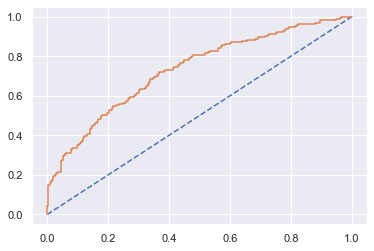

In [143]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.730


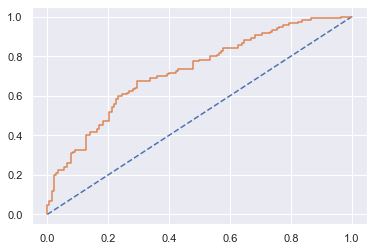

In [144]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);